<a href="https://colab.research.google.com/github/nnaapth/CondoinBKK/blob/master/Condo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dftest = pd.read_csv("/content/test.csv")
dftrain = pd.read_csv("/content/train.csv")

In [ ]:
print(dftrain.shape)
print(dftest.shape)

(8106, 36)
(2704, 38)


# delete null and duplicate data

Delete null(entire column=null for test&train,entire row=null for train and test) and duplicate data(duplicate col for train&test) then check its shape and col name

In [ ]:
dftrain_delnull = dftrain.copy()
dftest_delnull = dftest.copy()

In [ ]:
print(dftrain_delnull.head())
print(dftest_delnull.head())

      Id                project_name_th  area_total_min_wa  area_usable_min  \
0  38157           เดอะ สแตรนด์ ทองหล่อ                NaN             73.0   
1  28806          บ้านเอื้ออาทร บางโฉลง                NaN             33.0   
2   8859  ยู สบาย พระราม 4 - กล้วยน้ำไท                NaN            108.0   
3  24341        เอ สเปซ มี รัตนาธิเบศร์                NaN             25.0   
4   9841           วันพลัส สวนดอก 4 5 6                NaN             33.0   

   count_airconditioner  count_elevator  count_floor_internal  \
0                   NaN             NaN                   NaN   
1                   NaN             NaN                   NaN   
2                   NaN             NaN                   NaN   
3                   NaN             NaN                   NaN   
4                   NaN             NaN                   NaN   

   count_room_bath  count_room_bed  count_room_dinning  ...  \
0              2.0             2.0                 NaN  ...   
1       

In [ ]:
#check null
print(dftrain_delnull.columns[dftrain_delnull.isnull().all()])
print(dftest_delnull.columns[dftest_delnull.isnull().all()])

Index(['area_total_min_wa', 'count_elevator'], dtype='object')
Index(['area_total_min_wa', 'count_elevator'], dtype='object')


In [ ]:
#Drop column that contain all na
dftrain_delnull.dropna(axis=1, how='all', inplace=True)
dftest_delnull.dropna(axis=1, how='all', inplace=True)

In [ ]:
#Check Duplicate Data
print((dftrain_delnull['project_name_th'] == dftrain_delnull['project_name_th_1']).all())
print((dftest_delnull['project_name_th'] == dftest_delnull['project_name_th_1']).all())
print((dftest_delnull['Id'] == dftest_delnull['Id_2']).all())

False
False
False


In [ ]:
for i, row in dftrain_delnull.iterrows():
    a = row['project_name_th']
    b = row['project_name_th_1']
    if a != b:
        print(f"Row {i}: '{a}' vs '{b}'")

Row 303: 'nan' vs 'nan'
Row 4142: 'nan' vs 'nan'
Row 6301: 'nan' vs 'nan'


In [ ]:
for i, row in dftest_delnull.iterrows():
    a = row['project_name_th']
    b = row['project_name_th_1']
    if a != b:
        print(f"Row {i}: '{a}' vs '{b}'")


Row 543: 'nan' vs 'nan'
Row 1038: 'nan' vs 'nan'
Row 2702: 'nan' vs 'nan'
Row 2703: 'nan' vs 'nan'


In [ ]:
for i, row in dftest_delnull.iterrows():
    a = row['Id']
    b = row['Id_2']
    if a != b:
        print(f"Row {i}: '{a}' vs '{b}'")

Row 2702: 'nan' vs 'nan'
Row 2703: 'nan' vs 'nan'


In [ ]:
#drop duplicate data
dftrain_delnull.drop(columns=['project_name_th_1'], inplace=True)
dftest_delnull.drop(columns=['project_name_th_1', 'Id_2'], inplace=True)

In [ ]:
print(dftrain_delnull.columns)
print(dftest_delnull.columns)

Index(['Id', 'project_name_th', 'area_usable_min', 'count_airconditioner',
       'count_floor_internal', 'count_room_bath', 'count_room_bed',
       'count_room_dinning', 'count_room_guest', 'count_room_kitchen',
       'count_room_living', 'count_room_maid', 'count_room_storage',
       'count_room_utility', 'project_id', 'propertytype_name_en',
       'district_name_th', 'subdistrict_name_th', 'province_name_th',
       'zipcode', 'count_floor', 'count_unit', 'count_unittype',
       'facility_clubhouse', 'facility_fitness', 'facility_meeting',
       'facility_park', 'facility_playground', 'facility_pool',
       'facility_security', 'target', 'Latitude', 'Longitude'],
      dtype='object')
Index(['Id', 'project_name_th', 'area_usable_min', 'count_airconditioner',
       'count_floor_internal', 'count_room_bath', 'count_room_bed',
       'count_room_dinning', 'count_room_guest', 'count_room_kitchen',
       'count_room_living', 'count_room_maid', 'count_room_storage',
       'count

In [ ]:
# check all rows
print(dftrain_delnull[dftrain_delnull.isna().all(axis=1)])
print(dftest_delnull[dftest_delnull.isna().all(axis=1)])


Empty DataFrame
Columns: [Id, project_name_th, area_usable_min, count_airconditioner, count_floor_internal, count_room_bath, count_room_bed, count_room_dinning, count_room_guest, count_room_kitchen, count_room_living, count_room_maid, count_room_storage, count_room_utility, project_id, propertytype_name_en, district_name_th, subdistrict_name_th, province_name_th, zipcode, count_floor, count_unit, count_unittype, facility_clubhouse, facility_fitness, facility_meeting, facility_park, facility_playground, facility_pool, facility_security, target, Latitude, Longitude]
Index: []

[0 rows x 33 columns]
      Id project_name_th  area_usable_min  count_airconditioner  \
2702 NaN             NaN              NaN                   NaN   
2703 NaN             NaN              NaN                   NaN   

      count_floor_internal  count_room_bath  count_room_bed  \
2702                   NaN              NaN             NaN   
2703                   NaN              NaN             NaN   

    

In [ ]:
dftest_delnull = dftest_delnull.drop(dftest_delnull[dftest_delnull.isna().all(axis=1)].index)

In [ ]:
print(dftrain_delnull.shape)
print(dftest_delnull.shape)


(8106, 33)
(2702, 34)


#Drop unneccessary column

Drop unneccessary column that is word and not really effect to an output

In [ ]:
# Columns you care about
coltodrop = ['Id','project_name_th','project_id', 'propertytype_name_en',
        'district_name_th','subdistrict_name_th','province_name_th','zipcode']


dftrain_deldup = dftrain_delnull.drop(columns=coltodrop)
dftest_deldup= dftest_delnull.drop(columns=coltodrop + ['Expected'])

In [ ]:
print(dftrain_deldup.columns)
print(dftest_deldup.columns)

Index(['area_usable_min', 'count_airconditioner', 'count_floor_internal',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'count_floor', 'count_unit', 'count_unittype', 'facility_clubhouse',
       'facility_fitness', 'facility_meeting', 'facility_park',
       'facility_playground', 'facility_pool', 'facility_security', 'target',
       'Latitude', 'Longitude'],
      dtype='object')
Index(['area_usable_min', 'count_airconditioner', 'count_floor_internal',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'count_floor', 'count_unit', 'count_unittype', 'facility_clubhouse',
       'facility_fitness', 'facility_meeting', 'facility_park',
       'facility_playground

In [ ]:
dftrain_deldup.rename(columns={'target': 'Price'}, inplace=True)
dftest_deldup.rename(columns={'Target': 'Price'}, inplace=True)

In [ ]:
print(dftrain_deldup.shape)
print(dftest_deldup.shape)

(8106, 25)
(2702, 25)


#Remove Outlier

remove all outlier in column()

In [ ]:
dftrain_reOut=dftrain_deldup
dftest_reOut=dftest_deldup

In [ ]:
dftrain_reOut.describe()

,area_usable_min,count_airconditioner,count_floor_internal,count_room_bath,count_room_bed,count_room_dinning,count_room_guest,count_room_kitchen,count_room_living,count_room_maid,...,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,Price,Latitude,Longitude
count,8106.000000,402.000000,96.000000,8066.000000,8092.000000,2358.000000,953.000000,3450.000000,2756.000000,68.000000,...,3122.000000,6911.000000,2467.000000,5670.000000,2850.000000,6927.000000,7717.000000,8.106000e+03,8106.000000,8106.000000
mean,61.301585,1.900498,2.125000,1.378998,1.290287,1.000424,1.001049,1.002609,1.004717,1.058824,...,0.589686,0.951527,0.409809,0.884656,0.558596,0.957124,0.985746,8.194345e+04,13.682610,100.491897
std,68.164449,0.923535,0.784723,0.764721,0.936041,0.020593,0.032393,0.051016,0.078411,0.237044,...,0.491969,0.214780,0.491898,0.319465,0.496642,0.202591,0.118545,6.955799e+04,1.528944,0.608987
min,16.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.030303e+03,6.680804,98.290240
25%,30.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,4.415462e+04,13.706490,100.498062
50%,40.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,6.730389e+04,13.736155,100.562339
75%,62.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.885492e+04,13.810464,100.607759
max,1182.000000,6.000000,9.000000,8.000000,6.000000,2.000000,2.000000,2.000000,3.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.581463e+06,19.109209,104.142353


In [ ]:
from tabulate import tabulate

def check_outliers_iqr(df, col_name, th1=0.05, th3=0.95):
    q1 = df[col_name].quantile(th1)
    q3 = df[col_name].quantile(th3)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

def replace_with_iqr(df, col_names, th1, th3, replace = True):
    count = 0
    data = []
    for col in col_names:
        if col != 'Price':
            lower_limit, upper_limit = check_outliers_iqr(df, col, th1, th3)
            count_before = df[(df[col] > upper_limit) | (df[col] < lower_limit)][col].count()

            if replace and count_before>0:

                if lower_limit < 0:
                    df.loc[df[col] > upper_limit, col] = upper_limit
                else:
                    df.loc[df[col] > upper_limit, col] = upper_limit
                    df.loc[df[col] < lower_limit, col] = lower_limit

            count_after = df[(df[col] > upper_limit) | (df[col] < lower_limit)][col].count()
            data.append([count_before,count_after, col, round(lower_limit, 2), round(upper_limit, 2)])

    if data:
        table = tabulate(data, headers=['Outliers (Previously)', 'Outliers', 'Column', 'Lower Limit', 'Upper Limit'],
                         tablefmt='rst', numalign='right')
        print(table)

replace_with_iqr(dftrain_reOut, dftrain_reOut.columns, th1=0.05, th3=0.95)


=======================  ==========  ====================  =============  =============
  Outliers (Previously)    Outliers  Column                  Lower Limit    Upper Limit
=======================  ==========  ====================  =============  =============
                      0           0  area_usable_min                -195            389
                      0           0  count_airconditioner             -2              6
                      0           0  count_floor_internal            0.5            4.5
                      0           0  count_room_bath                  -2              6
                      0           0  count_room_bed                 -4.5            7.5
                      0           0  count_room_dinning                1              1
                      0           0  count_room_guest                  1              1
                      0           0  count_room_kitchen                1              1
                      0         

In [ ]:
print(dftrain_reOut.shape)
print(dftest_reOut.shape)

(8106, 25)
(2702, 25)


#Visualization
What questions do we want to ask of the data?
1.How much effect of each factor? on price
*   number of room factor:
*   location factor
*   number of factility factor
*   size factor
2.Which effect the most?

เดี๋ยวต้องแก้ว่า visualize นี้ดีพอมั้ย

In [ ]:
print(dftrain_reOut.columns)
print(dftest_reOut.columns)

Index(['area_usable_min', 'count_airconditioner', 'count_floor_internal',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'count_floor', 'count_unit', 'count_unittype', 'facility_clubhouse',
       'facility_fitness', 'facility_meeting', 'facility_park',
       'facility_playground', 'facility_pool', 'facility_security', 'Price',
       'Latitude', 'Longitude'],
      dtype='object')
Index(['area_usable_min', 'count_airconditioner', 'count_floor_internal',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'count_floor', 'count_unit', 'count_unittype', 'facility_clubhouse',
       'facility_fitness', 'facility_meeting', 'facility_park',
       'facility_playground'

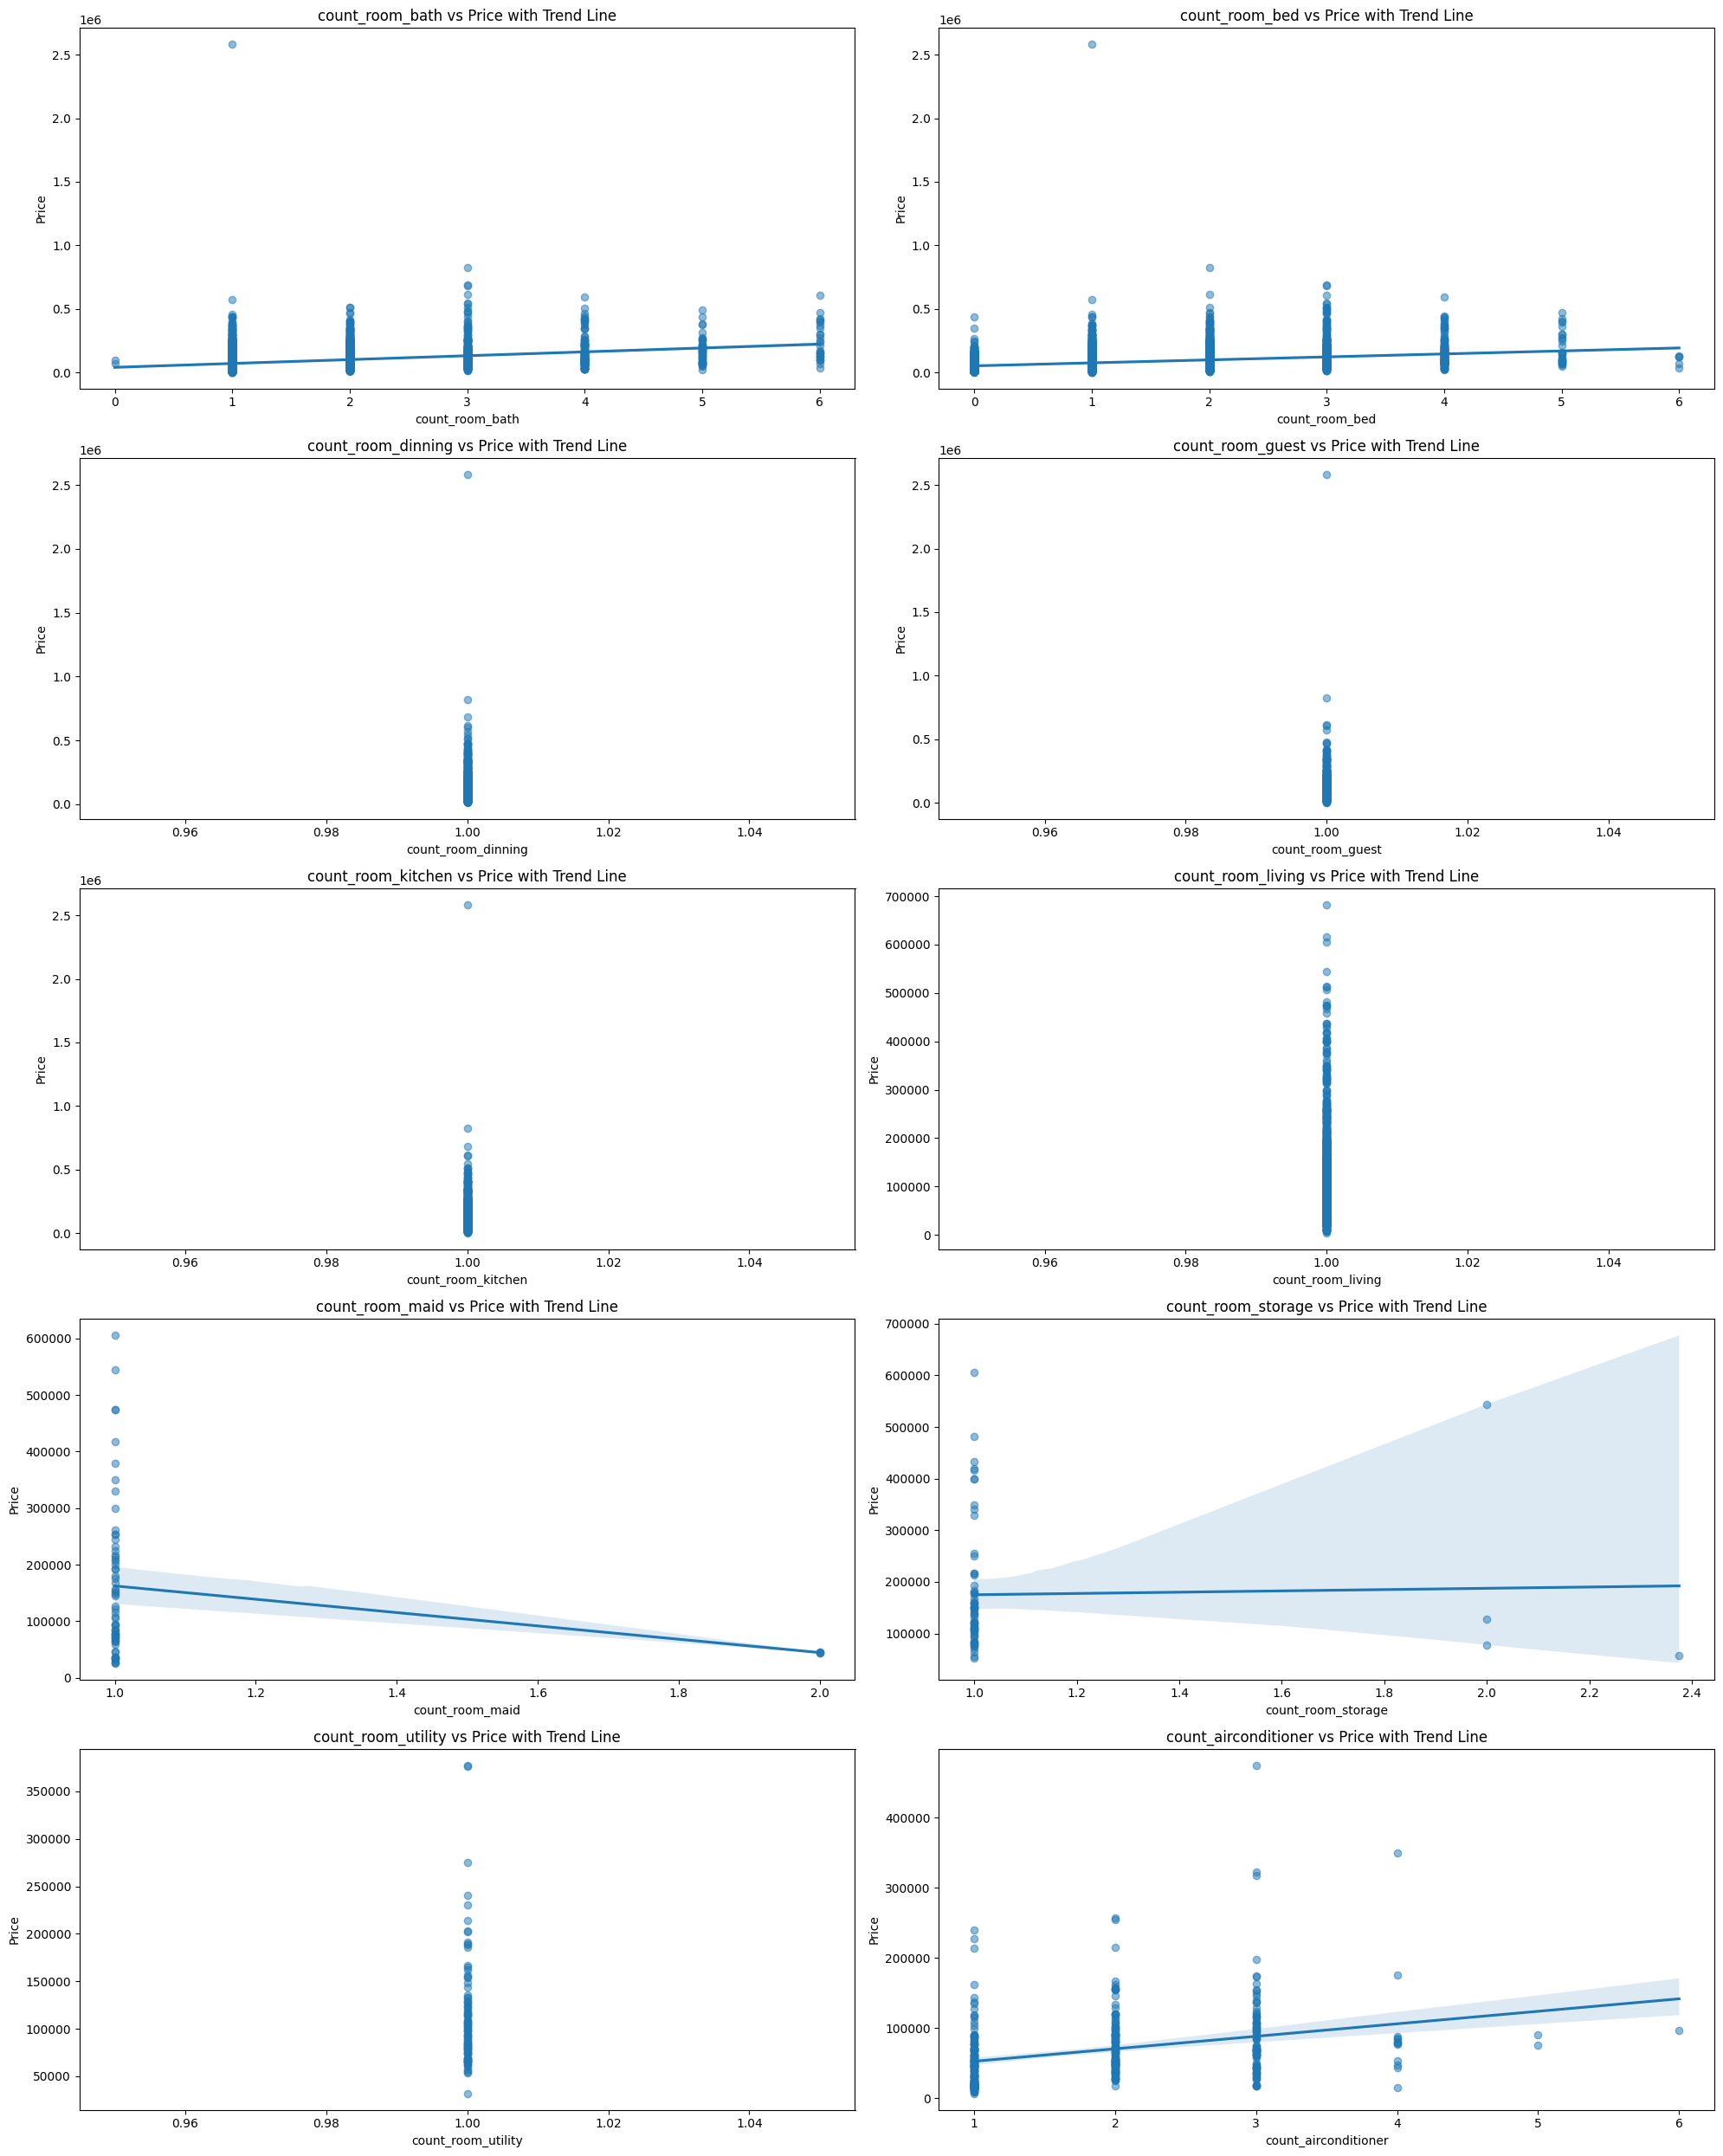

In [ ]:
room_labels = [	'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility','count_airconditioner']
plt.figure(figsize=(20, 25))

for i, label in enumerate(room_labels):
    plt.subplot(5, 2, i + 1)
    sns.regplot(
        x=dftrain_reOut[label],
        y=dftrain_reOut['Price'],
        scatter_kws={'alpha': 0.5}
    )
    plt.title(f'{label} vs Price with Trend Line')
    plt.xlabel(label)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

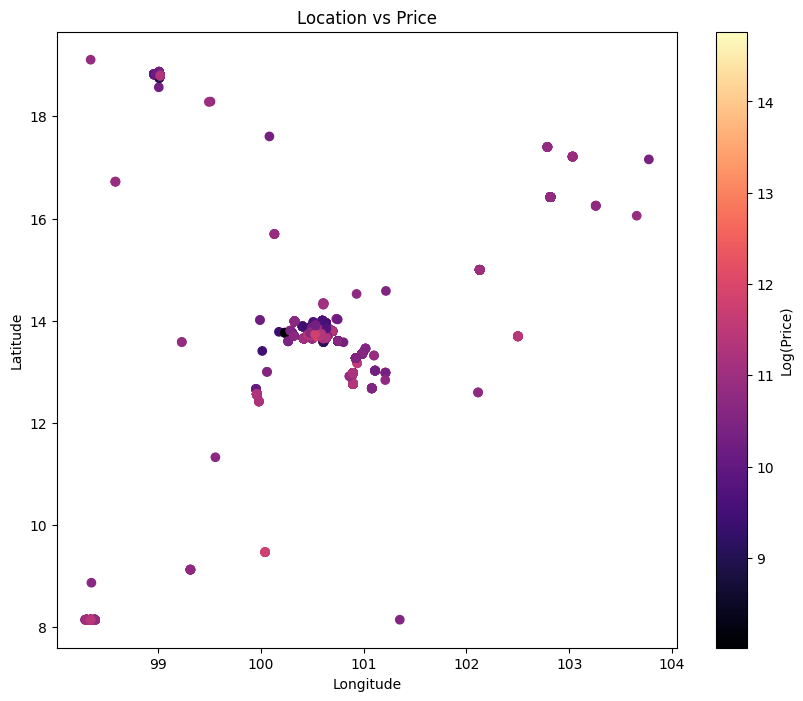

In [ ]:
#Location
plt.figure(figsize=(10, 8))
plt.scatter(dftrain_reOut['Longitude'],dftrain_reOut['Latitude'], c= np.log(dftrain_reOut['Price']) ,cmap='magma')
plt.colorbar(label='Log(Price)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location vs Price')
plt.show()

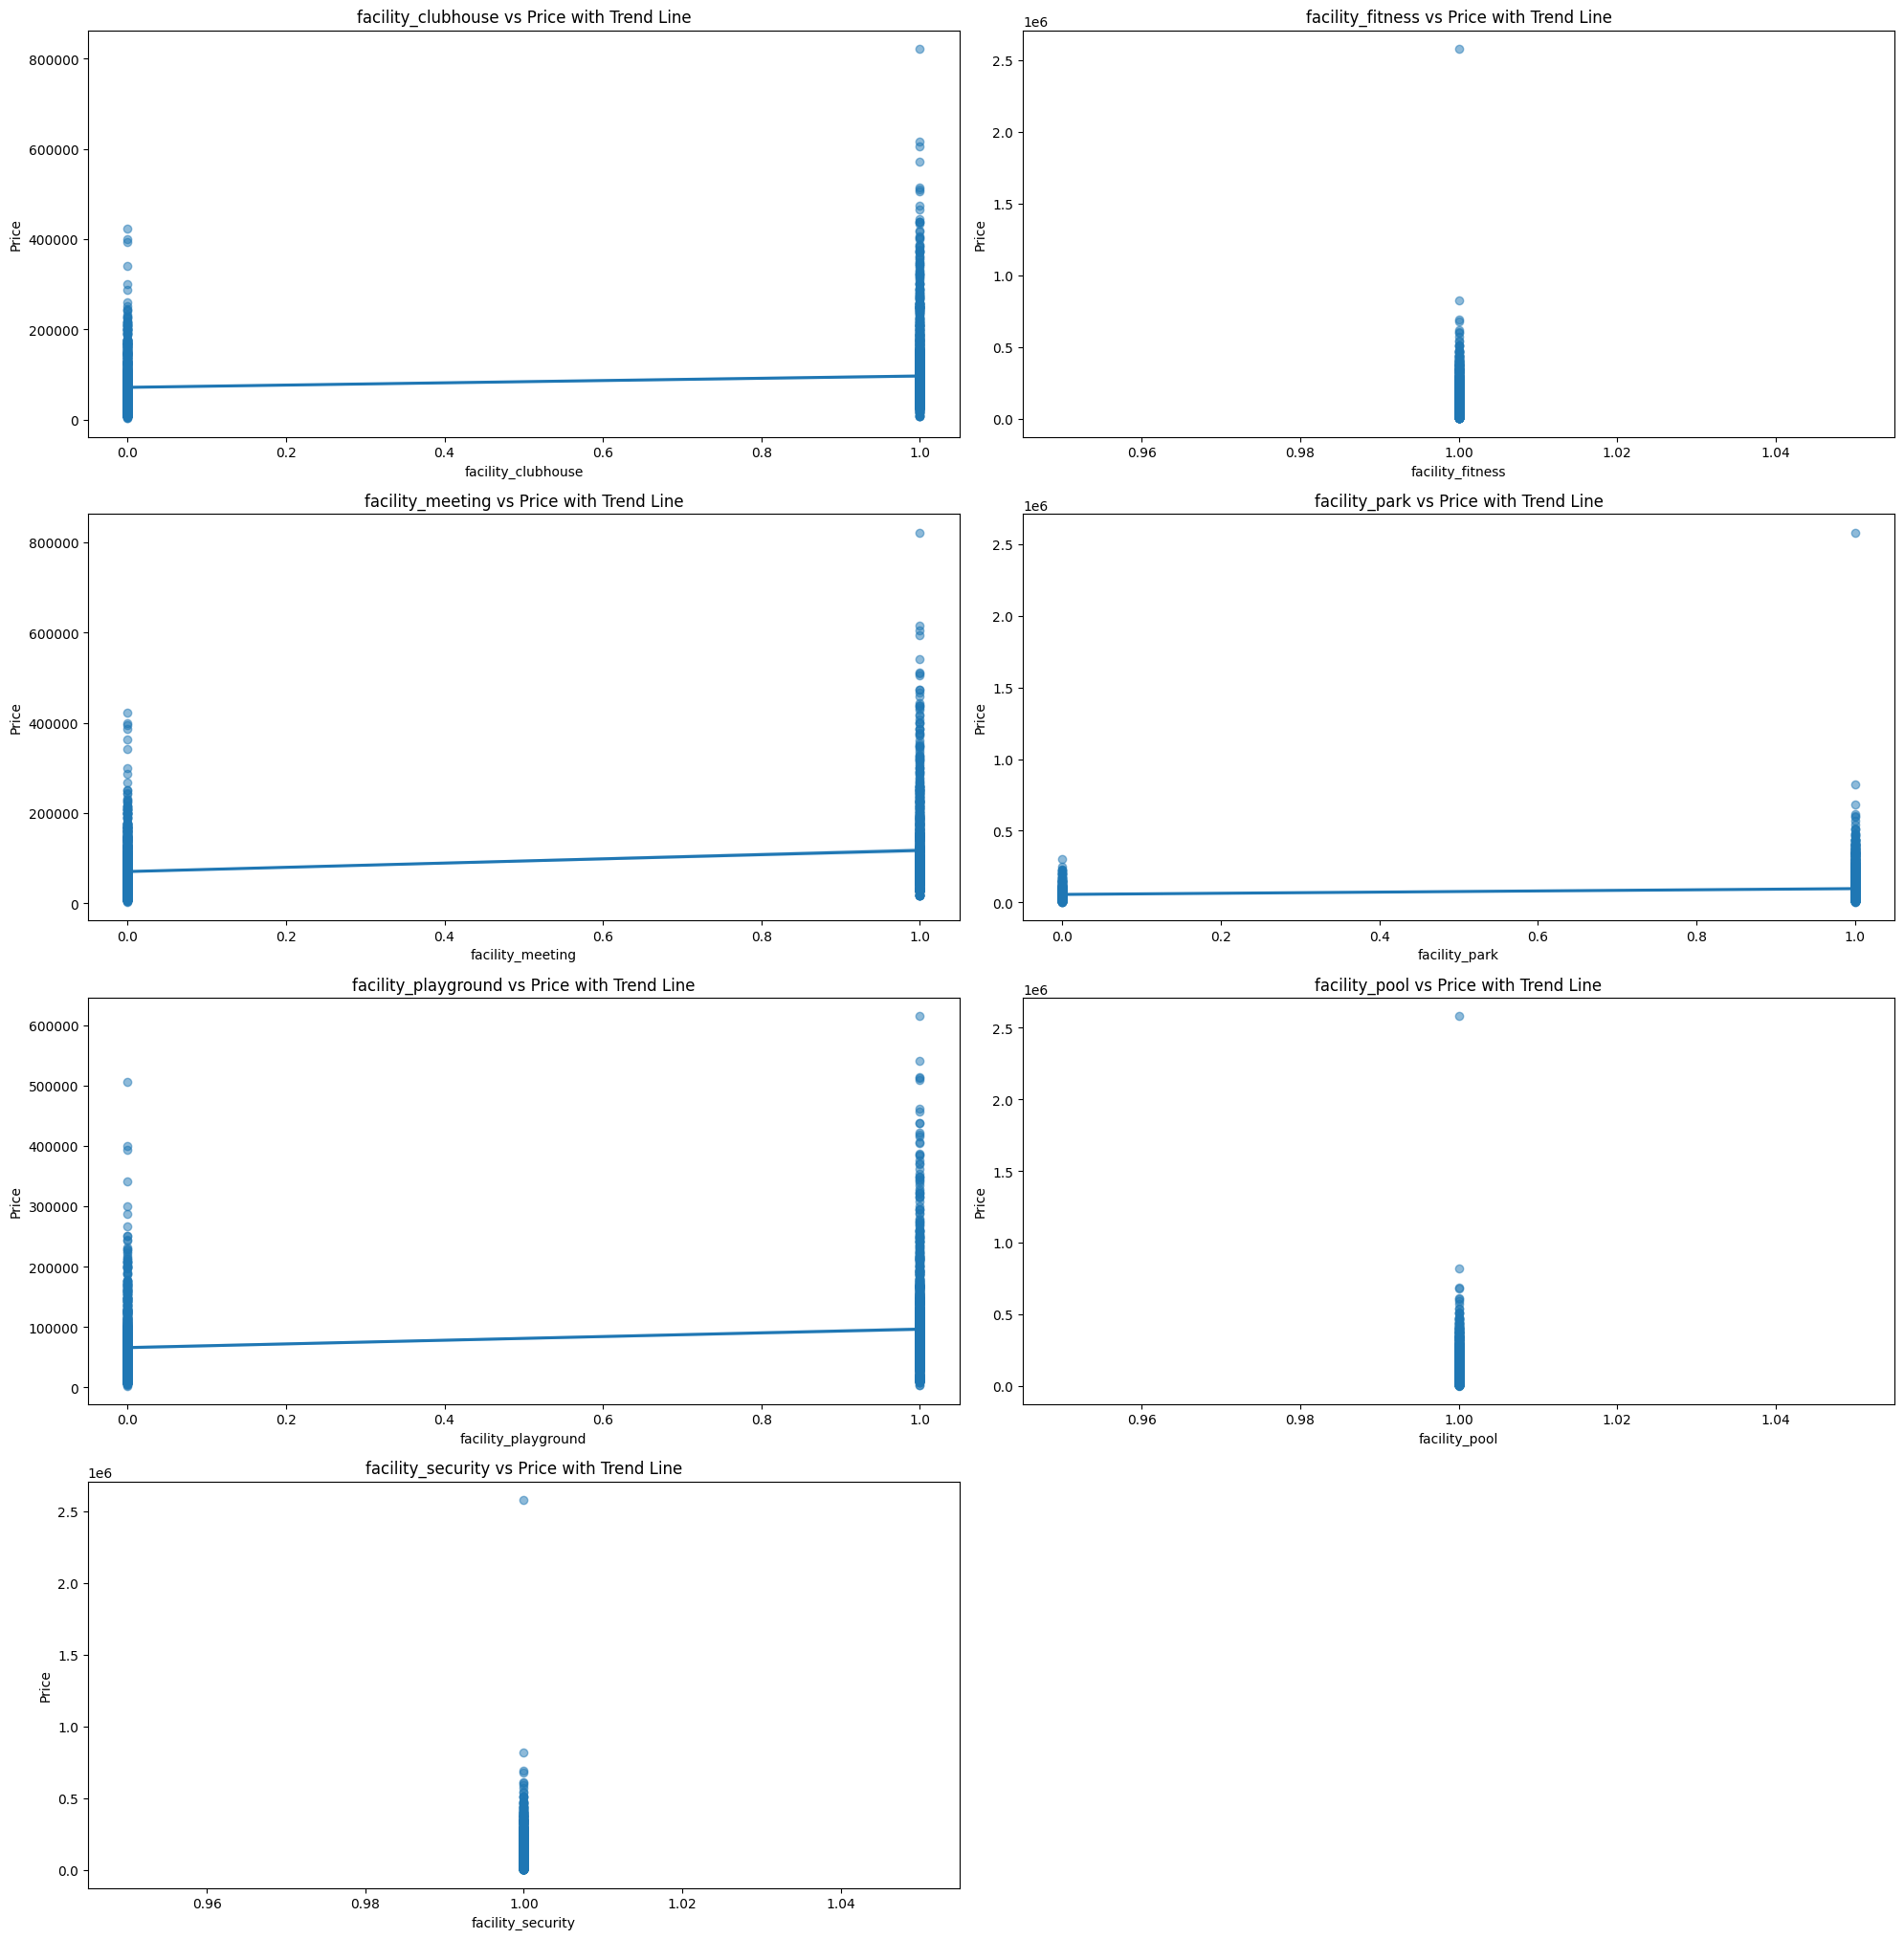

In [ ]:
#Facility
factility_labels = ['facility_clubhouse', 'facility_fitness', 'facility_meeting', 'facility_park','facility_playground', 'facility_pool', 'facility_security']

plt.figure(figsize=(20, 25))

for i, label in enumerate(factility_labels):
    plt.subplot(5, 2, i + 1)
    sns.regplot(
        x=dftrain_reOut[label],
        y=dftrain_reOut['Price'],
        scatter_kws={'alpha': 0.5}
    )
    plt.title(f'{label} vs Price with Trend Line')
    plt.xlabel(label)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

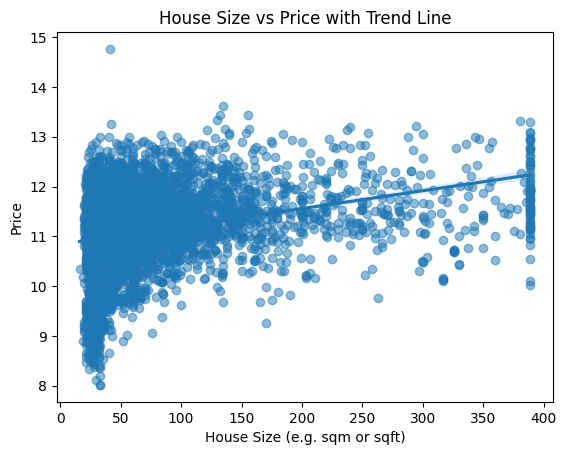

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=dftrain_reOut['area_usable_min'], y=np.log(dftrain_reOut['Price']), scatter_kws={'alpha': 0.5})
plt.title('House Size vs Price with Trend Line')
plt.xlabel('House Size (e.g. sqm or sqft)')
plt.ylabel('Price')
plt.show()


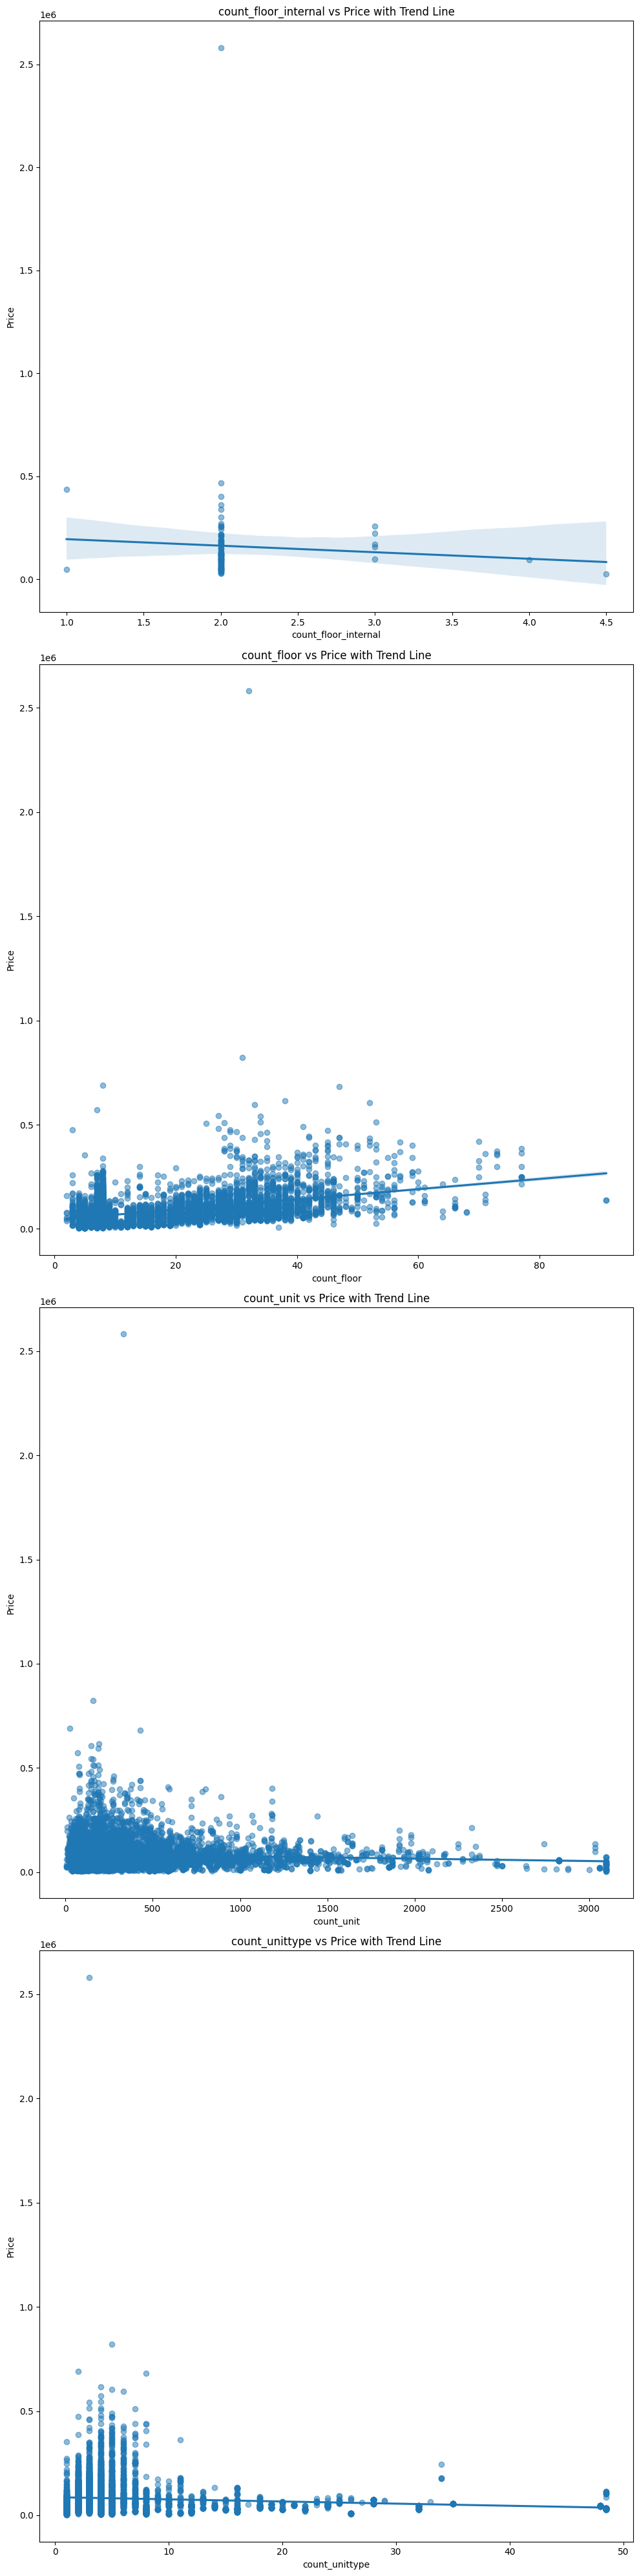

In [ ]:
project_labels =['count_floor_internal', 'count_floor', 'count_unit', 'count_unittype']
plt.figure(figsize=(10, 40))

for i, label in enumerate(project_labels):
    plt.subplot(4, 1, i + 1)
    sns.regplot(
        x=dftrain_reOut[label],
        y=dftrain_reOut['Price'],
        scatter_kws={'alpha': 0.5}
    )
    plt.title(f'{label} vs Price with Trend Line')
    plt.xlabel(label)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

<ipython-input-214-b340ae320179>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(label)['Price'].mean().reset_index()
<ipython-input-214-b340ae320179>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(label)['Price'].mean().reset_index()
<ipython-input-214-b340ae320179>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(label)['Price'].mean().res

   count_floor_internal          Price max_count_floor_internal
0        (0.996, 1.233]  242775.324420                    1.233
1        (1.233, 1.467]            NaN                    1.467
2          (1.467, 1.7]            NaN                    1.700
3          (1.7, 1.933]            NaN                    1.933
4        (1.933, 2.167]  159122.103290                    2.167
5          (2.167, 2.4]            NaN                    2.400
6          (2.4, 2.633]            NaN                    2.633
7        (2.633, 2.867]            NaN                    2.867
8          (2.867, 3.1]  180455.010696                    3.100
9          (3.1, 3.333]            NaN                    3.333
10       (3.333, 3.567]            NaN                    3.567
11         (3.567, 3.8]            NaN                    3.800
12         (3.8, 4.033]   94696.969700                    4.033
13       (4.033, 4.267]            NaN                    4.267
14         (4.267, 4.5]   25652.173910  

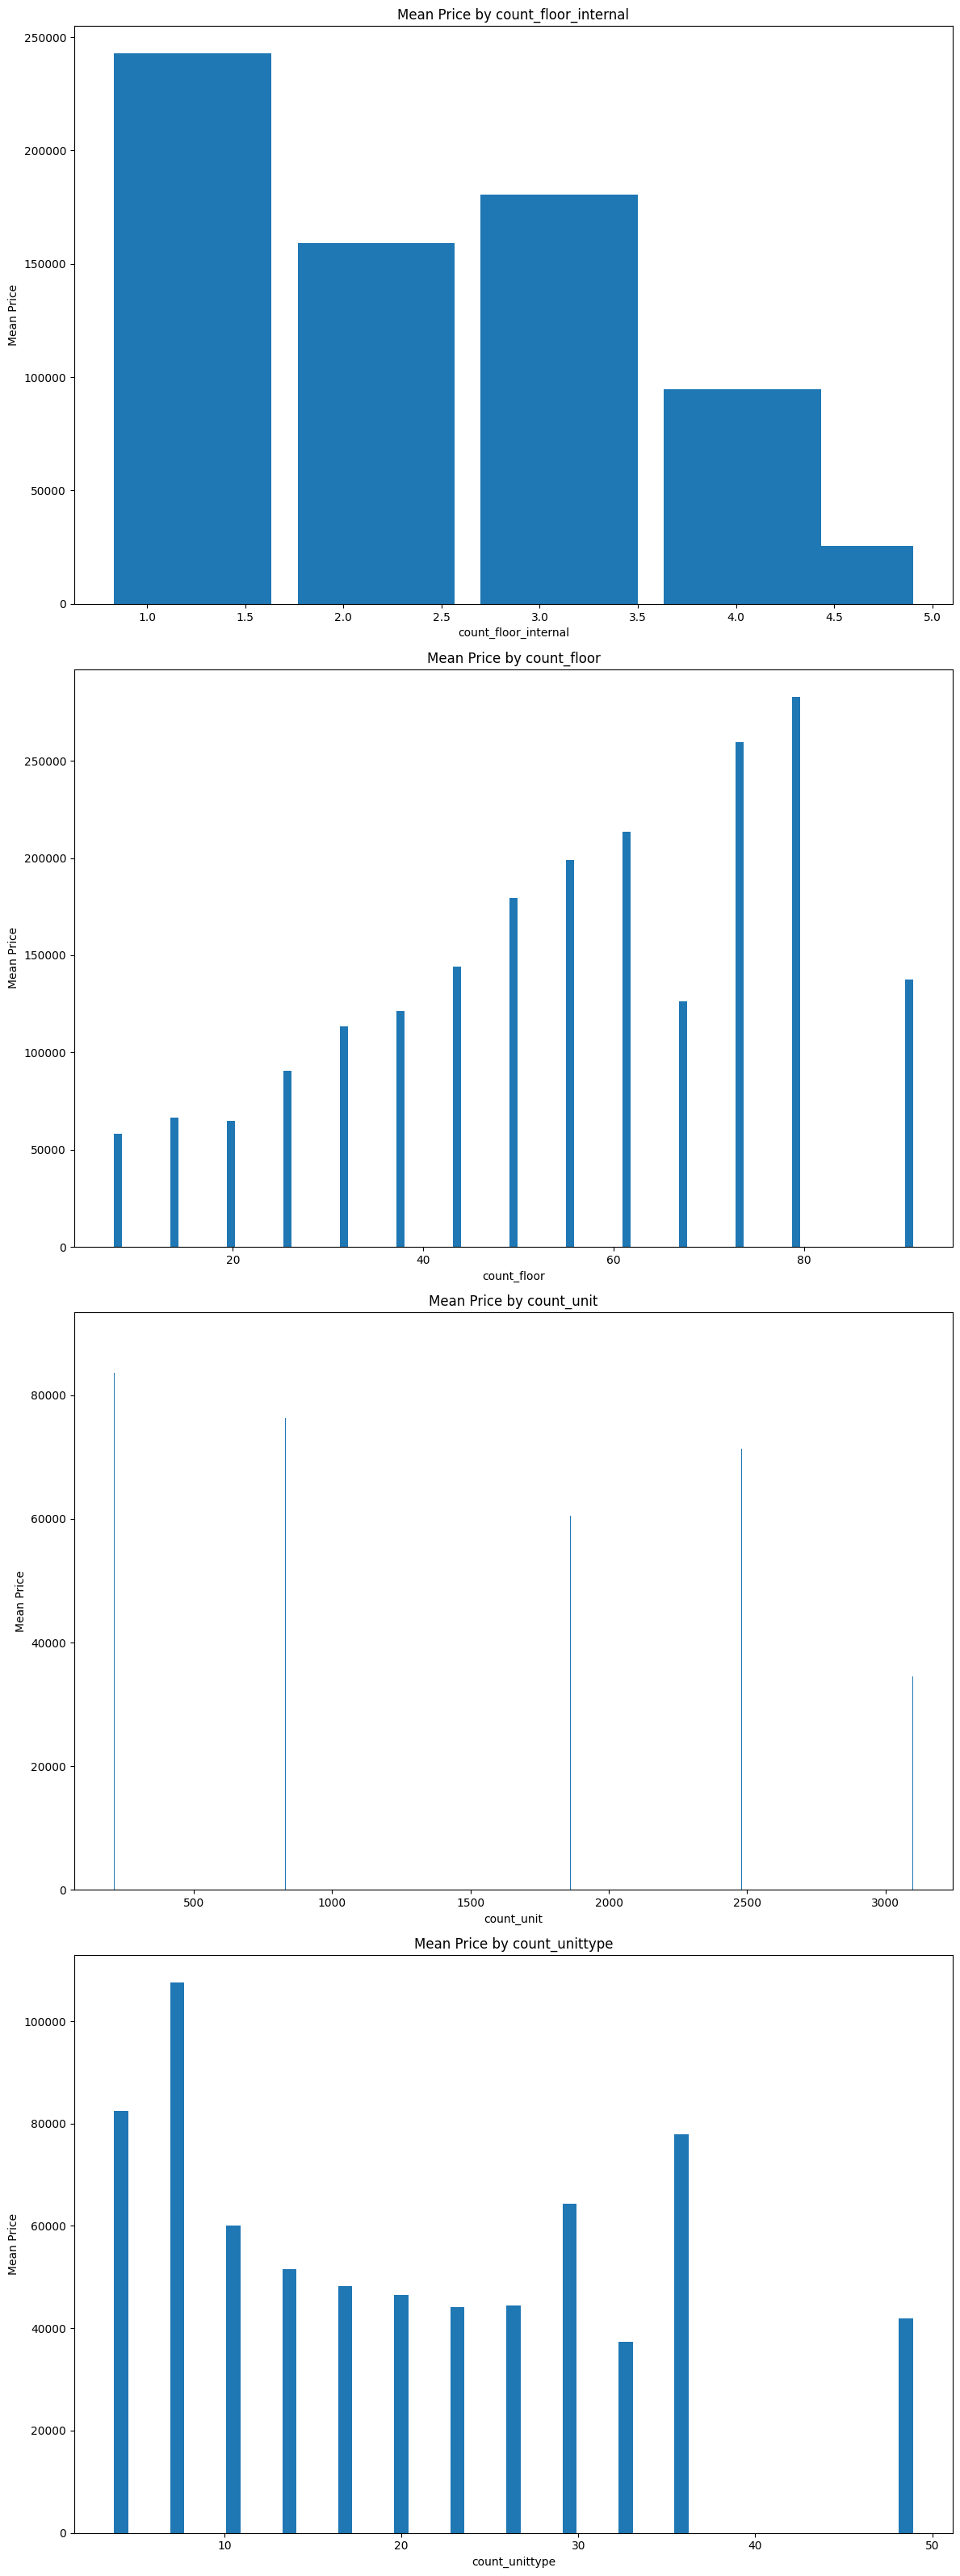

In [ ]:
fig, axes = plt.subplots(len(project_labels), 1, figsize=(12, 8 * len(project_labels)))
temp_df = dftrain_reOut.copy()

for i, label in enumerate(project_labels):
  temp_df[label] = pd.cut(temp_df[label], bins=15)
  grouped = temp_df.groupby(label)['Price'].mean().reset_index()
  grouped['max_'+label] = grouped[label].apply(lambda x: x.right)
  print(grouped)

  axes[i].bar(grouped['max_'+label], grouped['Price'])
  axes[i].set_title(f'Mean Price by {label}')
  axes[i].set_xlabel(label)
  axes[i].set_ylabel('Mean Price')

plt.tight_layout()
plt.show()

In [ ]:
dftrain_reOut.columns

Index(['area_usable_min', 'count_airconditioner', 'count_floor_internal',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'count_floor', 'count_unit', 'count_unittype', 'facility_clubhouse',
       'facility_fitness', 'facility_meeting', 'facility_park',
       'facility_playground', 'facility_pool', 'facility_security', 'Price',
       'Latitude', 'Longitude'],
      dtype='object')

#Spit Train and Test

In [ ]:
X_train = dftrain_reOut.drop(columns='Price')
y_train = dftrain_reOut['Price']
X_test = dftest_reOut.drop(columns='Price')
y_test = dftest_reOut['Price']


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8106, 24)
(8106,)
(2702, 24)
(2702,)


#Pipeline

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None):
        self.kmeans_ = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X)
        self.cluster_centers_ = self.kmeans_.cluster_centers_
        return self

    def transform(self, X):
        return rbf_kernel(X, self.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, input_features=None):
        return np.array([f"cluster_sim_{i}" for i in range(self.n_clusters)])


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
import numpy as np


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

num_attribs = [
    'count_airconditioner', 'count_room_bath', 'count_room_bed', 'count_room_dinning',
    'count_room_guest', 'count_room_kitchen', 'count_room_living', 'count_room_maid',
    'count_room_storage', 'count_room_utility', 'facility_clubhouse', 'facility_fitness',
    'facility_meeting', 'facility_park', 'facility_playground', 'facility_pool',
    'facility_security', 'area_usable_min','count_floor_internal', 'count_floor', 'count_unit', 'count_unittype'
]

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('map', cluster_simil, ['Latitude', 'Longitude'])
], remainder='passthrough')

Xtrain_prepared = preprocessing.fit_transform(X_train)
Xtest_prepared = preprocessing.transform(X_test)
print(Xtrain_prepared.shape)
print(Xtest_prepared.shape)

(8106, 32)
(2702, 32)


In [ ]:
print(type(Xtrain_prepared))


<class 'numpy.ndarray'>


In [ ]:
feature_names = preprocessing.get_feature_names_out()

X_train_df = pd.DataFrame(Xtrain_prepared, columns=feature_names)
X_test_df = pd.DataFrame(Xtest_prepared, columns=feature_names)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_df, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


                      Feature  Importance
19           num__count_floor    0.263964
20            num__count_unit    0.153732
30         map__cluster_sim_8    0.074765
17       num__area_usable_min    0.074651
28         map__cluster_sim_6    0.051687
21        num__count_unittype    0.051404
23         map__cluster_sim_1    0.049936
18  num__count_floor_internal    0.025096
2         num__count_room_bed    0.022347
1        num__count_room_bath    0.020769
22         map__cluster_sim_0    0.020393
15         num__facility_pool    0.020206
12      num__facility_meeting    0.019197
4       num__count_room_guest    0.018897
10    num__facility_clubhouse    0.015968
29         map__cluster_sim_7    0.013262
27         map__cluster_sim_5    0.011433
3     num__count_room_dinning    0.010801
13         num__facility_park    0.010629
6      num__count_room_living    0.009453
14   num__facility_playground    0.008854
24         map__cluster_sim_2    0.008066
5     num__count_room_kitchen    0

In [ ]:
top_4_feature_names = feature_importance['Feature'].head(4).tolist()
top_6_feature_names = feature_importance['Feature'].head(6).tolist()
top_8_feature_names = feature_importance['Feature'].head(8).tolist()
top_4_feature_data = X_train_df[top_4_feature_names]
top_6_feature_data = X_train_df[top_6_feature_names]
top_8_feature_data = X_train_df[top_8_feature_names]
print(top_6_feature_data)

      num__count_floor  num__count_unit  map__cluster_sim_8  \
0             1.126922        -0.450498            0.995470   
1            -0.834723        -0.858723            0.929341   
2            -0.599325        -0.556897            0.995470   
3             0.499196         0.012011            0.983052   
4            -0.677791        -0.713239            0.996427   
...                ...              ...                 ...   
8101          1.440785         3.536203            0.994127   
8102          1.519251        -0.074845            0.995470   
8103          0.185333         0.105382            0.995470   
8104         -0.599325        -0.691525            0.999793   
8105         -0.599325         1.028229            0.970836   

      num__area_usable_min  map__cluster_sim_6  num__count_unittype  
0                 0.220401            0.999237            -0.131859  
1                -0.460853            0.966543            -0.541905  
2                 0.816498       

In [ ]:
print(top_4_feature_names)

['num__count_floor', 'num__count_unit', 'map__cluster_sim_8', 'num__area_usable_min']


#Select model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor

algos = [
    (KNeighborsRegressor(n_neighbors=5), 'KNeighborsRegressor'),
    (RandomForestRegressor(n_estimators=100, random_state=42), 'RandomForestRegressor'),
    (LinearRegression(), 'LinearRegression'),
    (SVR(kernel='rbf'), 'SVR_rbf'),
    (DecisionTreeRegressor(random_state=42), 'DecisionTreeRegressor'),
    (ExtraTreeRegressor(random_state=42), 'ExtraTreeRegressor')
]

model_scores = []

for model, name in algos:
    scores = cross_val_score(model, top_6_feature_data, y_train,
                             scoring='neg_root_mean_squared_error', cv=10)
    mean_rmse = -np.mean(scores)
    model_scores.append((name, mean_rmse))

for name, score in model_scores:
    print(f"{name}: RMSE = {score:.4f}")

KNeighborsRegressor: RMSE = 54294.5393
RandomForestRegressor: RMSE = 41926.4992
LinearRegression: RMSE = 57474.1377
SVR_rbf: RMSE = 69713.5091
DecisionTreeRegressor: RMSE = 55169.0919
ExtraTreeRegressor: RMSE = 66999.4274


In [ ]:
from sklearn.model_selection import cross_val_score
feature_sets = {
    'Top 4': top_4_feature_names,
    'Top 6': top_6_feature_names,
    'Top 8': top_8_feature_names
}

for label, features in feature_sets.items():
    X_subset = X_train_df[features]
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    scores = cross_val_score(model, X_subset, y_train,
                             scoring='neg_root_mean_squared_error', cv=5)
    mean_rmse = -np.mean(scores)
    print(f"{label} Features -> RMSE: {mean_rmse:.4f}")

Top 4 Features -> RMSE: 46058.2205
Top 6 Features -> RMSE: 44240.1094
Top 8 Features -> RMSE: 43982.7366


#Fine Tune

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

best_param_perfold=[]
outer_scores = []

param_grid = {
    'n_estimators': [100,500,1000],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

model = RandomForestRegressor(random_state=42)
outer_cv = KFold(n_splits=3)

#do scores manually= cross_val_score(inner_cv, top_6_feature_data, y_train, cv=outer_cv, scoring=('neg_root_mean_squared_error'))

for i, (train_index, test_index) in enumerate(outer_cv.split(top_6_feature_data, y_train)):
    X_train_fold, X_test_fold = top_6_feature_data.iloc[train_index], top_6_feature_data.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    inner_cv = GridSearchCV(model, param_grid, cv=3, scoring=('neg_root_mean_squared_error'))
    inner_cv.fit(X_train_fold, y_train_fold)

    best_param_perfold.append(inner_cv.best_estimator_)

    y_pred = inner_cv.predict(X_test_fold)
    mse = mean_squared_error(y_test_fold, y_pred)
    rmse = np.sqrt(mse)
    outer_scores.append(rmse)

    print(f"Fold {i}: Best params = {inner_cv.best_params_}, Best score = {rmse:.4f}")


Fold 0: Best params = {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1000}, Best score = 57582.0001
Fold 1: Best params = {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500}, Best score = 37936.7305
Fold 2: Best params = {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500}, Best score = 40300.9994


#Predict Value

ทำยังไงงงทำไมค่ามันสูงแปลกๆ

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

ids = dftest_delnull['Id']

feature_names = preprocessing.get_feature_names_out()
XT_prepared_df = pd.DataFrame(Xtest_prepared , columns=feature_names)

test4_data =XT_prepared_df[top_4_feature_names]
test6_data = XT_prepared_df[top_6_feature_names]
test8_data = XT_prepared_df[top_8_feature_names]

model1 = RandomForestRegressor(max_depth=None, max_features='sqrt', n_estimators=500, random_state=42)
model1.fit(top_4_feature_data, y_train)
model2 = RandomForestRegressor(max_depth=None, max_features='sqrt', n_estimators=500, random_state=42)
model2.fit(top_6_feature_data, y_train)
model3 = RandomForestRegressor(max_depth=None, max_features='sqrt', n_estimators=500, random_state=42)
model3.fit(top_8_feature_data, y_train)

preds4 = model1.predict(test4_data)
preds6 = model2.predict(test6_data)
preds8 = model3.predict(test8_data)

output = pd.DataFrame({
    'Id': ids,
    'SalePrice_preds4': preds4,
    'SalePrice_preds6': preds6,
    'SalePrice_preds8': preds8
})

print(output.head())

mse4 = mean_squared_error(dftest_delnull['Expected'].to_numpy(), np.log(preds4))
rmse4 = np.sqrt(mse4)
mse6 = mean_squared_error(dftest_delnull['Expected'].to_numpy(), np.log(preds6))
rmse6 = np.sqrt(mse6)
mse8 = mean_squared_error(dftest_delnull['Expected'].to_numpy(), np.log(preds8))
rmse8 = np.sqrt(mse8)
print(f"Top 4 features — RMSE : {rmse4:.4f}")
print(f"Top 6 features — RMSE : {rmse6:.4f}")
print(f"Top 8 features — RMSE : {rmse8:.4f}")

        Id  SalePrice_preds4  SalePrice_preds6  SalePrice_preds8
0  37083.0      13415.777670      37484.795730      43194.820691
1  12301.0     159775.642499     153779.634906     158972.611443
2  15583.0      67553.173169      60392.507736      60222.091719
3  27620.0     110437.149055     112835.618158     113462.402129
4  35278.0      51436.087507      49788.420815      49869.268228
Top 4 features — RMSE : 0.4016
Top 6 features — RMSE : 0.3658
Top 8 features — RMSE : 0.3618


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare data
ids = dftest_delnull['Id']
feature_names = preprocessing.get_feature_names_out()
XT_prepared_df = pd.DataFrame(Xtest_prepared, columns=feature_names)

# Define configs
feature_sets = {
    '4': top_4_feature_names,
    '6': top_6_feature_names,
    '8': top_8_feature_names
}
train_sets = {
    '4': top_4_feature_data,
    '6': top_6_feature_data,
    '8': top_8_feature_data
}
predictions = {}

# Train, predict, and evaluate
for k in ['4', '6', '8']:
    model = RandomForestRegressor(max_depth=None, max_features='sqrt', n_estimators=500, random_state=42)
    model.fit(train_sets[k], y_train)
    test_data = XT_prepared_df[feature_sets[k]]
    preds = model.predict(test_data)
    predictions[f'SalePrice_preds{k}'] = preds

    mse = mean_squared_error(dftest_delnull['Expected'], np.log(preds))
    rmse = np.sqrt(mse)
    print(f"Top {k} features — RMSE : {rmse:.4f}")

# Create output DataFrame
output = pd.DataFrame({'Id': ids, **predictions})
print(output.head())


Top 4 features — RMSE : 0.4016
Top 6 features — RMSE : 0.3658
Top 8 features — RMSE : 0.3618
        Id  SalePrice_preds4  SalePrice_preds6  SalePrice_preds8
0  37083.0      13415.777670      37484.795730      43194.820691
1  12301.0     159775.642499     153779.634906     158972.611443
2  15583.0      67553.173169      60392.507736      60222.091719
3  27620.0     110437.149055     112835.618158     113462.402129
4  35278.0      51436.087507      49788.420815      49869.268228


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


feature_names = preprocessing.get_feature_names_out()
Xtrain_prepared_df = pd.DataFrame(Xtrain_prepared, columns=feature_names)
Xtest_prepared_df = pd.DataFrame(Xtest_prepared, columns=feature_names)


top_features_counts = [4, 6, 8]


top_features_list = {
    n: feature_importance['Feature'].head(n).tolist()
    for n in top_features_counts
}


for n in top_features_counts:
    print(f"\nTraining with top {n} features...")
    top_feats = top_features_list[n]

    X_train_subset = Xtrain_prepared_df[top_feats]
    X_test_subset = Xtest_prepared_df[top_feats]


    model = RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=500, random_state=42)
    model.fit(X_train_subset, y_train)


    preds = model.predict(X_test_subset)


    output = pd.DataFrame({
        'Id': dftest_delnull['Id'],
        'SalePrice': preds
    })

    print(output.head())


    mse = mean_squared_error(dftest_delnull['Expected'].to_numpy(), np.log(preds))
    rmse = np.sqrt(mse)
    print(f"Top {n} features — RMSE (log space): {rmse:.4f}")



Training with top 4 features...
        Id      SalePrice
0  37083.0   33382.475326
1  12301.0  166269.314373
2  15583.0   80801.498915
3  27620.0  116312.149330
4  35278.0   50156.427553
Top 4 features — RMSE (log space): 0.5628

Training with top 6 features...
        Id      SalePrice
0  37083.0   48176.924758
1  12301.0  167958.409619
2  15583.0   69437.558135
3  27620.0  121480.967569
4  35278.0   44383.685836
Top 6 features — RMSE (log space): 0.5577

Training with top 8 features...
        Id      SalePrice
0  37083.0   56612.099871
1  12301.0  162529.120422
2  15583.0   70897.851729
3  27620.0  119549.798798
4  35278.0   58585.328139
Top 8 features — RMSE (log space): 0.5531
